In [0]:
#Python kóði til þess að prufa greiningu á umferðarskiltum
#Vinsamlega skoðið leiðbeiningar í readme.md

#Kóðinn þarf að keyra í möppu sem inniheldur alla file-a
# úr demo.zip skránni sem er á Github.

#BREYTIÐ HÉR Í RÉTTAR MÖPPUR
#slóð á möppu sem inniheldur upprunalegar myndir
mappa = "/content/drive/My Drive/myndir_merkt" #BREYTA

#slóð á möppu þar sem croppaðar-myndir af skiltum vistast
skilti = "/content/drive/My Drive/skilti" #BREYTA

#slóð á möppu þar sem merktar myndir í fullri stærð vistast
merkt = "/content/drive/My Drive/myndir_unedited" #BREYTA


In [4]:
#við þurfum að nota útgáfu 1.13.1 af tensorflow
!pip3 install tensorflow-gpu==1.13.1
!pip3 install imageai --upgrade


     |████████████████████████████████| 345.2MB 21kB/s 
     |████████████████████████████████| 3.2MB 34.3MB/s 
     |████████████████████████████████| 368kB 37.5MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
     |████████████████████████████████| 184kB 6.4MB/s 


In [6]:
#Kóðabútur sem finnur skiltin á myndunum, merkir, croppar og setur í rétta möppu
from imageai.Detection.Custom import CustomObjectDetection
import os 
from PIL import Image

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("detection_model-ex-033--loss-0002.490.h5") 
detector.setJsonPath("detection_config.json")
detector.loadModel()

def crop(image_path, coords, saved_location):
    """
    @param image_path: The path to the image to edit
    @param coords: A tuple of x/y coordinates (x1, y1, x2, y2)
    @param saved_location: Path to save the cropped image
    """
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(saved_location)
    cropped_image.show()

n = 1
for img in os.listdir(mappa):


    path = os.path.join(mappa, img)

    detections = detector.detectObjectsFromImage(input_image=path, output_image_path= merkt+'/'+str(img))
    size = []
    for detection in detections:
        print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
        for value in detection["box_points"]:
            size.append(value)

    k = int(len(size)/4)

    for i in range(0,k):
        if __name__ == '__main__':
            image = path
            crop(image, (size[0+i*4], size[1+i*4], size[2+i*4], size[3+i*4]), skilti+'/test'+str(n)+'skilti'+str(i)+'.png')
    n+=1

traffic sign  :  57.62370228767395  :  [138, 57, 225, 174]
traffic sign  :  56.43736720085144  :  [1027, 127, 1045, 156]
traffic sign  :  57.76399374008179  :  [85, 201, 164, 310]
traffic sign  :  52.39059329032898  :  [518, 105, 579, 148]
traffic sign  :  50.277841091156006  :  [524, 159, 574, 199]
traffic sign  :  62.14297413825989  :  [576, 138, 600, 163]
traffic sign  :  57.43665099143982  :  [498, 51, 529, 81]
traffic sign  :  59.93150472640991  :  [528, 53, 561, 86]
traffic sign  :  51.18657350540161  :  [836, 163, 907, 221]


In [8]:
#Tökum nú myndirnar sem tölvan fann á stóru myndunum og greinum þær
import keras
import matplotlib.pyplot as plt
from keras.models import Input, Model
import os, pickle, shutil
import numpy as np
import csv
import cv2

nofn_flokka = []
with open("nofn.csv", "r") as f:
    reader = csv.reader(f)
    for content in reader:
        nofn_flokka.append(content[1])
        
nofn_flokka = nofn_flokka[1:]      
print("Fjöldi flokka:",len(nofn_flokka))

model = keras.models.load_model("classifier.model")


Fjöldi flokka: 47


In [0]:
#Föll til þess að spá fyrir um skilti
def prepare(filepath):
    IMG_SIZE = 32  
    Upprunaleg_mynd = cv2.imread(filepath)
    Upprunaleg_mynd = cv2.cvtColor(Upprunaleg_mynd,cv2.COLOR_BGR2RGB)
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
    plt.imshow(Upprunaleg_mynd)
    plt.show()  # display!
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  


def spa_mappa(dirmappa):

  for img in os.listdir(dirmappa):
    path = os.path.join(dirmappa,img)
    prediction = model.predict([prepare(path)])

    #Hér röðum við möguleikum í röð
    prediction = prediction[0,:]
    listi = prediction.tolist()
    top5 = sorted(range(len(listi)), key=lambda i: listi[i], reverse=True)[:5]
    print("     Ágiskun módels: ", nofn_flokka[int(top5[0])])
    print("     Top 5 ágiskannir")
    for i in range(5):
      print("     ",nofn_flokka[int(top5[i])],'{:6.5%}'.format(float((listi[int(top5[i])]/sum(listi)))))

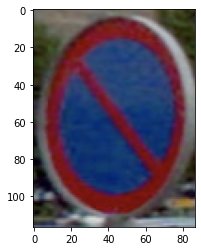

     Ágiskun módels:  Banna að leggja
     Top 5 ágiskannir
      Banna að leggja 100.00000%
      Götuskilti 0.00000%
      Hámarkshraði (60 km/klst) 0.00000%
      Aksturstefna til hægri 0.00000%
      Hámarkshraði (90 km/klst) 0.00000%


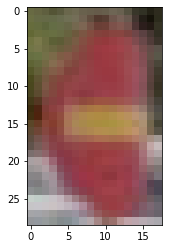

     Ágiskun módels:  Innakstur bannaður
     Top 5 ágiskannir
      Innakstur bannaður 100.00000%
      Frammúrakstur bannaður 0.00000%
      Götuskilti 0.00000%
      Aksturstefna til hægri 0.00000%
      Hámarkshraði (90 km/klst) 0.00000%


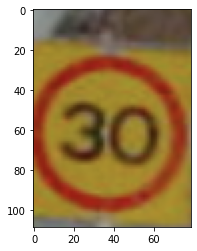

     Ágiskun módels:  Hámarkshraði (30 km/klst)
     Top 5 ágiskannir
      Hámarkshraði (30 km/klst) 100.00000%
      Hámarkshraði (90 km/klst) 0.00000%
      Hámarkshraði (80 km/klst) 0.00000%
      Götuskilti 0.00000%
      Aðalbraut 0.00000%


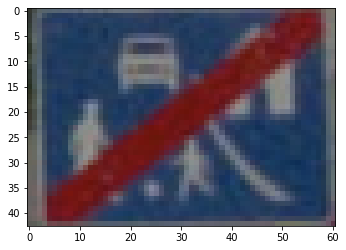

     Ágiskun módels:  Hámarkshraða lokið (80 km/klst)
     Top 5 ágiskannir
      Hámarkshraða lokið (80 km/klst) 77.95412%
      Afnám banna 22.04462%
      Vegavinna 0.00051%
      Þéttbýli endar 0.00040%
      Biðskylda 0.00024%


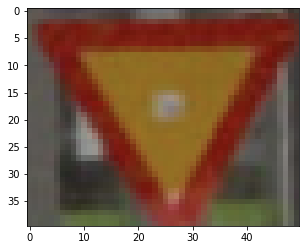

     Ágiskun módels:  Biðskylda
     Top 5 ágiskannir
      Biðskylda 100.00000%
      Þéttbýli endar 0.00000%
      Götuskilti 0.00000%
      Aðalbraut 0.00000%
      Hámarkshraði (60 km/klst) 0.00000%


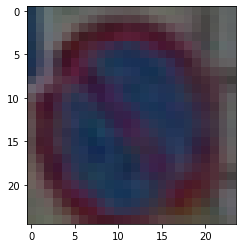

     Ágiskun módels:  Banna að leggja
     Top 5 ágiskannir
      Banna að leggja 99.99633%
      Aksturstefna til hægri 0.00247%
      Vinstri beygja framundan 0.00063%
      Götuskilti 0.00032%
      Hámarkshraði (60 km/klst) 0.00008%


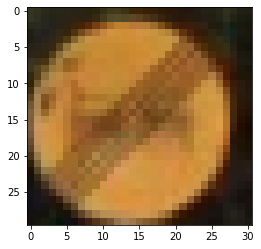

     Ágiskun módels:  Banni við framúrakstri lokið
     Top 5 ágiskannir
      Banni við framúrakstri lokið 99.94237%
      Götuskilti 0.05572%
      Frammúrakstur bannaður 0.00128%
      Banni við framúrakstri vörubifreiða lokið 0.00056%
      Hringakstur 0.00008%


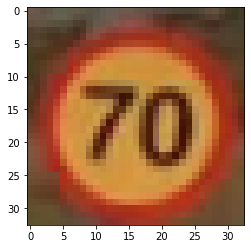

     Ágiskun módels:  Hámarkshraði (90 km/klst)
     Top 5 ágiskannir
      Hámarkshraði (90 km/klst) 99.73121%
      Hámarkshraði (30 km/klst) 0.25573%
      Hámarkshraði (70 km/klst) 0.01299%
      Hámarkshraði (20 km/klst) 0.00007%
      Götuskilti 0.00000%


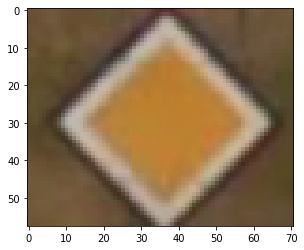

     Ágiskun módels:  Aðalbraut
     Top 5 ágiskannir
      Aðalbraut 100.00000%
      Hámarkshraði (30 km/klst) 0.00000%
      Hringakstur 0.00000%
      Innakstur bannaður 0.00000%
      Banna að leggja 0.00000%


In [11]:
#spáum fyrir öllum þeim skiltum sem eru í möppuni skilti
spa_mappa(skilti)